In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dependencies

In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 31.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
!pip install --upgrade --no-deps statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install -U -q PyDrive


# Libraries

In [6]:
import pandas as pd
import numpy as np
from operator import itemgetter
import math
import itertools
import operator #ordered dict

import time
import datetime

#R square for regression fit
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

#Table Formatter
from google.colab.data_table import DataTable
DataTable.max_columns = 50

#Seasonality
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

#ARIMA
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

#Custom Library Connection
import sys
import os
import import_ipynb
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [8]:
module_helper = drive.CreateFile({'id':'18rMYExGP6aHMSVHValrZjXfb_7ll-T4v'})
module_helper.GetContentFile('helperFunctions.ipynb')
module_helper

GoogleDriveFile({'id': '18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'kind': 'drive#file', 'etag': '"MTY0ODc5OTM2NjYzNg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'webContentLink': 'https://drive.google.com/uc?id=18rMYExGP6aHMSVHValrZjXfb_7ll-T4v&export=download', 'alternateLink': 'https://colab.research.google.com/drive/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'embedLink': 'https://drive.google.com/file/d/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google.colaboratory', 'title': 'helperFunctions.ipynb', 'mimeType': 'application/vnd.google.colaboratory', 'description': 'Colaboratory notebook', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2022-03-09T08:17:39.034Z', 'modifiedDate': '2022-04-01T07:49:26.636Z', 'modifiedByMeDate': '2022-04-01T07:49

In [9]:
from helperFunctions import*

importing Jupyter notebook from helperFunctions.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
path="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole.csv"


In [11]:
path03="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole03.csv"
df03 = pd.read_csv(path03)
df03

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,2554,2554,4576773,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
1,2557,2557,4576774,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
2,2555,2555,4576775,108747,exception,NaN,NaN,NaN,NaN,ClientListError,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
3,2558,2558,4576776,108747,Client Detail,2499.0,Customer History,2022-03-04 00:00:07 +0000,2022-03-04 00:00:09 +0000,Customer History,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
4,2556,2556,4576777,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,...,NaN,NaN,RequestServiceProvider-post,NaN,Http failure response for (unknown url): 0 Unk...,NaN,2022-03-04,0,Friday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149175,146665,146665,5276116,593619,Home,4637.0,Load HomePage KPI from service,2022-03-20 23:57:01 +0000,2022-03-20 23:57:06 +0000,Load HomePage KPI from service,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149176,146664,146664,5276117,593619,593619,NaN,NaN,NaN,NaN,Set User ID,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149177,146663,146663,5276118,593619,Home,1685.0,Load Agenda from service,2022-03-20 23:57:18 +0000,2022-03-20 23:57:20 +0000,Load Agenda from service,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149178,146662,146662,5276119,593619,Contacts,3544.0,Load contacts from service,2022-03-20 23:57:20 +0000,2022-03-20 23:57:24 +0000,Load contacts from service,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2


# Data

In [12]:
df = pd.read_csv(path)
df = df.drop('Unnamed: 0',axis=1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,21,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Formatting

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = pd.to_datetime(df['date'])
df["ts"] = [df["Timestamp"].iloc[i].timestamp() for i in range(len(df))]

type(df.iloc[0].Timestamp),type(df.iloc[0].date)

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

# Memory Usage

Check if memory usage = 0, for any samples in df


In [14]:
df[df["Memoria Usata"]== 0]

,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,Tipo Evento,...,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag,ts


In [15]:
df[np.isnan(df["Memoria Usata"])]

,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,Tipo Evento,...,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag,ts


In [16]:
df_h_indexed = df.set_index('Timestamp').resample('60min').mean()
df_h_indexed

,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,ts
Timestamp,,,,,,,,,,,
2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0,1.643675e+09
2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0,1.643680e+09
2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0,1.643684e+09
2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0,1.643691e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0,1.646076e+09
2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0,1.646080e+09
2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0,1.646083e+09


In [17]:
df_h_indexed[np.isnan(df_h_indexed["Memoria Usata"])]

,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,ts
Timestamp,,,,,,,,,,,
2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-03 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=df_h_indexed.index,
    y =df_h_indexed["Memoria Usata"]
))


fig.show()

In [19]:
df_h_indexed = df_h_indexed.dropna()

In [20]:
len(df_h_indexed[np.isnan(df_h_indexed["Memoria Usata"])])

0

In [21]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [22]:
#df_testing = pd.DataFrame(np.log(df.Value).diff().diff(12))
adf_check(df_h_indexed["Memoria Usata"].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.562838319150987
p-value : 0.00015114981033354183
Number of Lags Used : 14
Number of Observations Used : 455
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:

# df["isLinear"]=[df["Timestamp"].iloc[1] - df["Timestamp"].iloc[0] if i == 0 else df["Timestamp"].iloc[i] - df["Timestamp"].iloc[i-1] for i in range(len(df))]
# df["isLinear"]

In [24]:
# df["isLinear"].iloc[1]> df["isLinear"].iloc[1474941]

In [25]:
# isLinear = df["isLinear"]
# isLinear= sorted(isLinear, reverse=True)

In [26]:
# isLinear

In [27]:
# df[df.isLinear=='0 days 09:22:00.999000']

In [28]:
# df.isLinear.iloc[0]

## Resampling Data Hourly

In [33]:
df_15 = df.set_index('Timestamp').resample('60min').mean()
df_30 = df.set_index('Timestamp').resample('30min').mean()
df_60 = df.set_index('Timestamp').resample('60min').mean()
df_90 = df.set_index('Timestamp').resample('90min').mean()
df_120 = df.set_index('Timestamp').resample('120min').mean()
df_150 = df.set_index('Timestamp').resample('150min').mean()
df_180 = df.set_index('Timestamp').resample('180min').mean()
df_240 = df.set_index('Timestamp').resample('240min').mean()
df_270 = df.set_index('Timestamp').resample('270min').mean()
df_300 = df.set_index('Timestamp').resample('300min').mean()
df_330 = df.set_index('Timestamp').resample('330min').mean()
df_360 = df.set_index('Timestamp').resample('360min').mean()
df_390 = df.set_index('Timestamp').resample('390min').mean()
df_420 = df.set_index('Timestamp').resample('420min').mean()
df_450 = df.set_index('Timestamp').resample('450min').mean()


print("len 30:{}, nan values: {}".format(len(df_30), df_30['Memoria Usata'].isna().sum()))
print("len 60:{}, nan values: {}".format(len(df_60), df_60['Memoria Usata'].isna().sum()))
print("len 90:{}, nan values: {}".format(len(df_90), df_90['Memoria Usata'].isna().sum()))
print("len 120:{}, nan values: {}".format(len(df_120), df_120['Memoria Usata'].isna().sum()))
print("len 150:{}, nan values: {}".format(len(df_150), df_150['Memoria Usata'].isna().sum()))
print("len 180:{}, nan values: {}".format(len(df_180), df_180['Memoria Usata'].isna().sum()))
print("len 240:{}, nan values: {}".format(len(df_240), df_240['Memoria Usata'].isna().sum()))
print("len 270:{}, nan values: {}".format(len(df_270), df_270['Memoria Usata'].isna().sum()))
print("len 300:{}, nan values: {}".format(len(df_300), df_300['Memoria Usata'].isna().sum()))
print("len 330:{}, nan values: {}".format(len(df_330), df_330['Memoria Usata'].isna().sum()))
print("len 360:{}, nan values: {}".format(len(df_360), df_360['Memoria Usata'].isna().sum()))
print("len 390:{}, nan values: {}".format(len(df_390), df_390['Memoria Usata'].isna().sum()))
print("len 420:{}, nan values: {}".format(len(df_420), df_420['Memoria Usata'].isna().sum()))
print("len 450:{}, nan values: {}".format(len(df_450), df_450['Memoria Usata'].isna().sum()))

len 30:1344, nan values: 201
len 60:672, nan values: 63
len 90:448, nan values: 28
len 120:336, nan values: 11
len 150:269, nan values: 8
len 180:224, nan values: 5
len 240:168, nan values: 2
len 270:150, nan values: 2
len 300:135, nan values: 2
len 330:123, nan values: 0
len 360:112, nan values: 1
len 390:104, nan values: 0
len 420:96, nan values: 0
len 450:90, nan values: 0


In [34]:
df_210 = df.set_index('Timestamp').resample('210min').mean()
print("len 210:{}, nan values: {}".format(len(df_210), df_210['Memoria Usata'].isna().sum()))


len 210:192, nan values: 5


In [ ]:
df_15 = df_15.loc[:, ['Memoria Usata']]

In [ ]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2022-02-01 00:00:00 to 2022-02-28 23:00:00
Freq: 60T
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Memoria Usata  609 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


In [ ]:
df_15

,Memoria Usata
Timestamp,
2022-02-01 00:00:00,66.974122
2022-02-01 01:00:00,55.682537
2022-02-01 02:00:00,68.725000
2022-02-01 03:00:00,NaN
2022-02-01 04:00:00,73.976471
...,...
2022-02-28 19:00:00,67.097551
2022-02-28 20:00:00,61.370595
2022-02-28 21:00:00,69.099310


In [ ]:
df_15[np.isnan(df_15["Memoria Usata"])]

,Memoria Usata
Timestamp,
2022-02-01 03:00:00,NaN
2022-02-02 00:00:00,NaN
2022-02-02 02:00:00,NaN
2022-02-03 01:00:00,NaN
2022-02-03 02:00:00,NaN
...,...
2022-02-27 01:00:00,NaN
2022-02-27 02:00:00,NaN
2022-02-27 03:00:00,NaN


In [ ]:
df_15 = df_15.reset_index()
df_15["Memoria Usata"]= fill_missing_previous(df_15)[0]

In [ ]:
df_15

,Timestamp,Memoria Usata
0,2022-02-01 00:00:00,66.974122
1,2022-02-01 01:00:00,55.682537
2,2022-02-01 02:00:00,68.725000
3,2022-02-01 03:00:00,64.380769
4,2022-02-01 04:00:00,73.976471
...,...,...
667,2022-02-28 19:00:00,67.097551
668,2022-02-28 20:00:00,61.370595
669,2022-02-28 21:00:00,69.099310
670,2022-02-28 22:00:00,73.652603


In [ ]:
df_15.set_index('Timestamp',drop = True, inplace = True)


In [ ]:
df_15

,Memoria Usata
Timestamp,
2022-02-01 00:00:00,66.974122
2022-02-01 01:00:00,55.682537
2022-02-01 02:00:00,68.725000
2022-02-01 03:00:00,64.380769
2022-02-01 04:00:00,73.976471
...,...
2022-02-28 19:00:00,67.097551
2022-02-28 20:00:00,61.370595
2022-02-28 21:00:00,69.099310


## Unevenly Distributed Data

In [ ]:
df_15["Memoria Usata"].index.freq = "H"

In [ ]:
print(df_15.index.inferred_freq)

H


## Seasonal Decompose

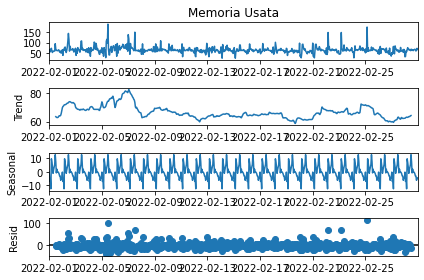

In [ ]:
result = seasonal_decompose(df_15["Memoria Usata"], model='additive')
result.plot()
plt.show()

In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
for i in range(0, 4800, 24):
  fig.add_trace(go.Scatter(
    x=[i for i in range(0,24)],
    y =df_15["Memoria Usata"][i:i+24]))
  
# fig.add_trace(go.Scatter(
#     x=[i for i in range(0,24)],
#     y =df_15["Memoria Usata"][:24]
# ))

# # add line / trace 2 to figure
# fig.add_trace(go.Scatter(
#     x=[i for i in range(0,24)],
#     y =df_15["Memoria Usata"][24:48]

# ))

fig.show()

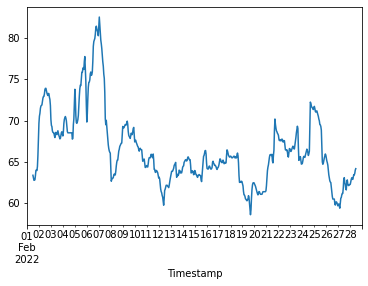

In [ ]:
result.trend.plot()

In [ ]:
df_15["Memoria Usata"][:48]

Timestamp
2022-02-01 00:00:00     66.974122
2022-02-01 01:00:00     55.682537
2022-02-01 02:00:00     68.725000
2022-02-01 03:00:00     64.380769
2022-02-01 04:00:00     73.976471
2022-02-01 05:00:00     58.430064
2022-02-01 06:00:00     54.647877
2022-02-01 07:00:00     61.014154
2022-02-01 08:00:00     60.729422
2022-02-01 09:00:00     61.256115
2022-02-01 10:00:00     61.003759
2022-02-01 11:00:00     95.093049
2022-02-01 12:00:00     70.214686
2022-02-01 13:00:00     64.064153
2022-02-01 14:00:00     63.849167
2022-02-01 15:00:00     62.931489
2022-02-01 16:00:00     62.802646
2022-02-01 17:00:00     67.126031
2022-02-01 18:00:00     64.726495
2022-02-01 19:00:00     56.949184
2022-02-01 20:00:00     58.497876
2022-02-01 21:00:00     52.874839
2022-02-01 22:00:00     63.542467
2022-02-01 23:00:00     51.921724
2022-02-02 00:00:00     66.974122
2022-02-02 01:00:00     41.267632
2022-02-02 02:00:00     68.725000
2022-02-02 03:00:00     64.380769
2022-02-02 04:00:00     77.053077
2022

## Hourly Correlations in a Single Day

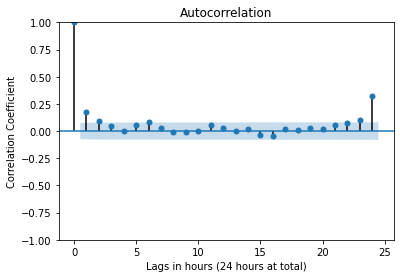

In [ ]:
plot_acf(df_15["Memoria Usata"].values, lags = 24)
plt.xlabel("Lags in hours (24 hours at total)")
plt.ylabel("Correlation Coefficient")
plt.show()

## Correlation Between Consecutive Days

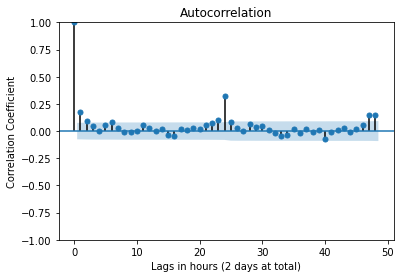

In [ ]:
plot_acf(df_15["Memoria Usata"].values, lags = 48)
plt.xlabel("Lags in hours (2 days at total)")
plt.ylabel("Correlation Coefficient")
plt.show()

## Weekly Correlations

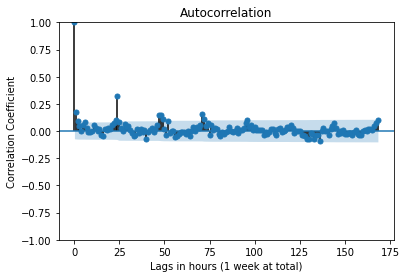

In [ ]:
plot_acf(df_15["Memoria Usata"].values, lags = 168)
plt.xlabel("Lags in hours (1 week at total)")
plt.ylabel("Correlation Coefficient")
plt.show()

##Stationarity of Data

### Train Test Split

In [ ]:
X= df_15.index
y=df_15["Memoria Usata"]
X_train, X_test, y_train, y_test = np.array(X[:int(len(X)*0.6)]).reshape(-1,1),np.array(X[int(len(X)*0.6):]).reshape(-1,1),np.array(y[:int(len(y)*0.6)]).reshape(-1,1),np.array(y[int(len(y)*0.6):]).reshape(-1,1)
print("Shape of X_train: {}, X_test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Shape of X_train: (403, 1), X_test: (269, 1), y_train: (403, 1), y_test: (269, 1)


### ADF Test

In [ ]:
def test_adf(series, title=''):
    dfout={}
    dftest=adfuller(series, autolag='AIC')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,maxlag=7*4, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (round(dfoutput,3))

test_stationarity(df_15["Memoria Usata"])

test_adf(df_15["Memoria Usata"], "Memoria Usata")

Results of Dickey-Fuller Test:
Test Statistic                  -2.955
p-value                          0.039
#Lags Used                      23.000
Number of Observations Used    648.000
Critical Value (1%)             -3.440
Critical Value (5%)             -2.866
Critical Value (10%)            -2.569
dtype: float64
Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary Memoria Usata


## Inspecting Derivatives

### Original Data

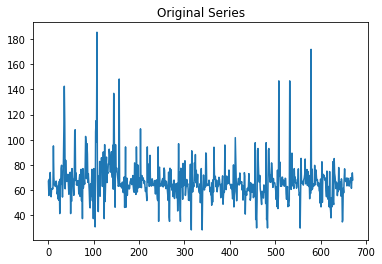

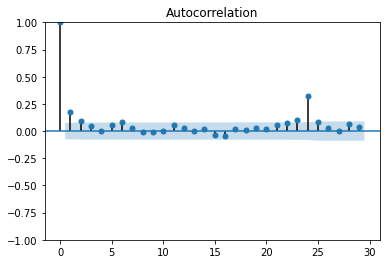

In [ ]:
plt.plot(np.array(df_15["Memoria Usata"]))
plt.title('Original Series')
plot_acf(np.array(df_15["Memoria Usata"]))
plt.show()

### First Order Derivative

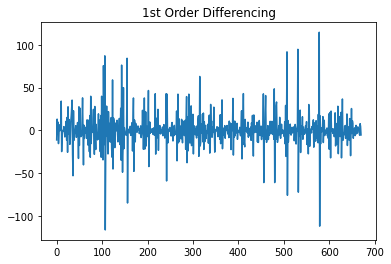

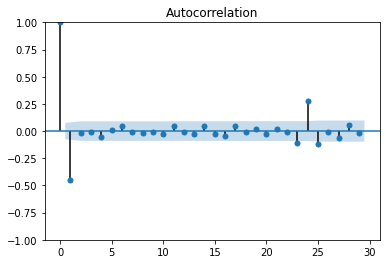

In [ ]:
# 1st Differencing
plt.plot(np.diff(np.array(df_15["Memoria Usata"])))
plt.title('1st Order Differencing')
plot_acf(pd.DataFrame(np.diff(np.array(df_15["Memoria Usata"]))).dropna())
plt.show()

### Second Order Derivative

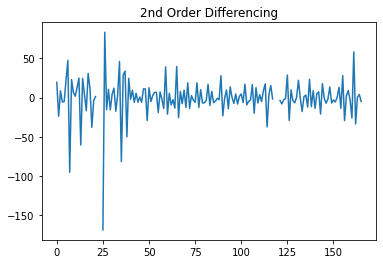

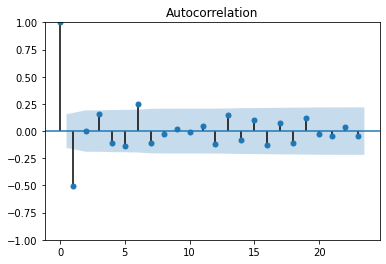

In [ ]:
# 2nd Differencing
plt.plot(np.diff(np.array(df_h_indexed["Memoria Usata"]),2)); plt.title('2nd Order Differencing')
plot_acf(pd.DataFrame(np.diff(np.array(df_h_indexed["Memoria Usata"]),2)).dropna())

plt.show()

### Differentiative Tests (ADF, KPSS, PP)

In [ ]:
print("ADF: {}\nKPSS: {}\nPP: {}".format(ndiffs(pd.DataFrame(np.diff(np.array(df_15["Memoria Usata"]))), test='adf'),ndiffs(pd.DataFrame(np.diff(np.array(df_15["Memoria Usata"]))), test='kpss'),ndiffs(pd.DataFrame(np.diff(np.array(df_15["Memoria Usata"]))), test='pp')))

ADF: 0
KPSS: 0
PP: 0


### PACF Test (Determining p)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



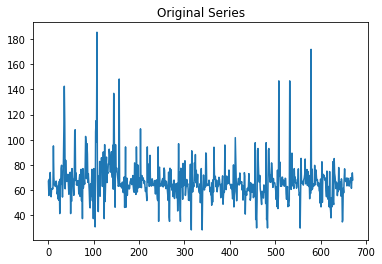

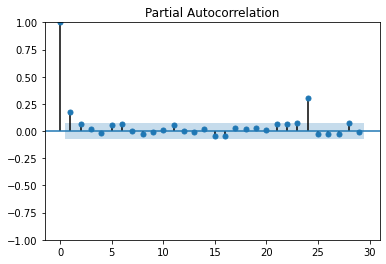

In [ ]:
plt.plot(np.array(df_15["Memoria Usata"])); plt.title('Original Series')
plot_pacf(np.array(df_15["Memoria Usata"]))
plt.show()

Lag 1 is significantly higher than the blue region, therefore we can set p 
value as 0.

### ACF Test (Determining q)

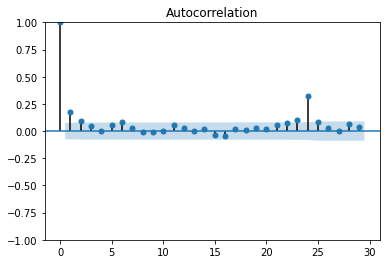

In [ ]:
plot_acf(np.array(df_15["Memoria Usata"]))
plt.show()

q = 1

# ARIMA

In [ ]:
def arimamodel(timeseriesarray):
    autoarima_model = auto_arima(timeseriesarray, 
                              start_p=0, 
                              start_q=0,
                              test="adf",
                              trace=True)
    return autoarima_model

arimamodel(np.array(df_15["Memoria Usata"])) 

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5585.289, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5566.732, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5569.363, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7583.841, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5565.974, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5567.750, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5567.946, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5567.709, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5569.750, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5770.525, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.382 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
arima_model = sm.tsa.ARIMA(df_15["Memoria Usata"], order=(2,0,0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Memoria Usata   No. Observations:                  672
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2778.987
Date:                Fri, 15 Apr 2022   AIC                           5565.974
Time:                        09:41:37   BIC                           5584.015
Sample:                    02-01-2022   HQIC                          5572.961
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.4315      0.956     69.494      0.000      64.558      68.305
ar.L1          0.1623      0.027      6.010      0.000       0.109       0.215
ar.L2          0.0639      0.028      2.312      0.0

In [ ]:
start_index=min(df_15.index);end_index=max(df_15.index)
start_index,end_index

(Timestamp('2022-02-01 00:00:00', freq='H'),
 Timestamp('2022-02-28 23:00:00', freq='H'))

In [ ]:
 df_15["arima_predict"] =arima_model_fit.predict(start=start_index, end=end_index)

In [ ]:
df_15

,Memoria Usata,arima_predict
Timestamp,,
2022-02-01 00:00:00,66.974122,66.431465
2022-02-01 01:00:00,55.682537,66.525573
2022-02-01 02:00:00,68.725000,64.721269
2022-02-01 03:00:00,64.380769,66.116507
2022-02-01 04:00:00,73.976471,66.245217
...,...,...
2022-02-28 19:00:00,67.097551,67.054263
2022-02-28 20:00:00,61.370595,66.750673
2022-02-28 21:00:00,69.099310,65.652513


## Actual Values vs Predictions

In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=df_h_indexed.index,
    y =df_15["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=df_h_indexed.index,
    y =df_15["arima_predict"]

))

fig.show()

In [ ]:
march01 =arima_model_fit.predict(start='2022-03-01 00:00:00', end='2022-03-10 00:00:00')

In [ ]:
pd.DataFrame(march01)

,predicted_mean
2022-03-01 00:00:00,67.176020
2022-03-01 01:00:00,66.663736
2022-03-01 02:00:00,66.516776
2022-03-01 03:00:00,66.460165
2022-03-01 04:00:00,66.441579
...,...
2022-03-09 20:00:00,66.431465
2022-03-09 21:00:00,66.431465
2022-03-09 22:00:00,66.431465
2022-03-09 23:00:00,66.431465


## Plot Residual Errors

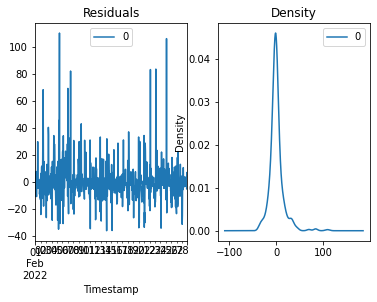

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(arima_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Model with Splitted Data

In [ ]:
df_train = df_15[:int(len(X)*0.9)]
df_test = df_15[int(len(X)*0.9):]
df_train

,Memoria Usata,arima_predict
Timestamp,,
2022-02-01 00:00:00,66.974122,66.431465
2022-02-01 01:00:00,55.682537,66.525573
2022-02-01 02:00:00,68.725000,64.721269
2022-02-01 03:00:00,64.380769,66.116507
2022-02-01 04:00:00,73.976471,66.245217
...,...,...
2022-02-25 23:00:00,49.592707,64.774035
2022-02-26 00:00:00,68.722222,63.222198
2022-02-26 01:00:00,46.574000,65.726681


In [ ]:
df_test

,Memoria Usata,arima_predict
Timestamp,,
2022-02-26 04:00:00,50.257778,68.723669
2022-02-26 05:00:00,72.708140,64.831811
2022-02-26 06:00:00,71.397551,66.416246
2022-02-26 07:00:00,70.152863,67.638941
2022-02-26 08:00:00,71.724484,67.353091
...,...,...
2022-02-28 19:00:00,67.097551,67.054263
2022-02-28 20:00:00,61.370595,66.750673
2022-02-28 21:00:00,69.099310,65.652513


In [ ]:
ar_model = auto_arima(np.array(df_train["Memoria Usata"]), 
                              start_p=0,d = 0,start_q=0,
                              test="adf", supress_warnings = True,
                              trace=True)
 

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5053.758, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5038.870, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5040.953, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6825.262, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5038.689, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5040.671, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5040.687, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5040.182, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5042.671, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5225.067, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.355 seconds


In [ ]:
df_train

,Memoria Usata,arima_predict
Timestamp,,
2022-02-01 00:00:00,66.974122,66.431465
2022-02-01 01:00:00,55.682537,66.525573
2022-02-01 02:00:00,68.725000,64.721269
2022-02-01 03:00:00,64.380769,66.116507
2022-02-01 04:00:00,73.976471,66.245217
...,...,...
2022-02-25 23:00:00,49.592707,64.774035
2022-02-26 00:00:00,68.722222,63.222198
2022-02-26 01:00:00,46.574000,65.726681


In [ ]:
ar_model = sm.tsa.ARIMA(df_train["Memoria Usata"], order=(2,0,0))
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Memoria Usata   No. Observations:                  604
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2515.344
Date:                Fri, 15 Apr 2022   AIC                           5038.689
Time:                        09:42:10   BIC                           5056.303
Sample:                    02-01-2022   HQIC                          5045.544
                         - 02-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8347      1.042     64.136      0.000      64.792      68.877
ar.L1          0.1560      0.029      5.360      0.000       0.099       0.213
ar.L2          0.0600      0.030      2.025      0.0

In [ ]:
train_start_index=min(df_train.index);train_end_index=max(df_train.index)
train_start_index,train_end_index

(Timestamp('2022-02-01 00:00:00', freq='H'),
 Timestamp('2022-02-26 03:00:00', freq='H'))

In [ ]:
df_train["arima_predict"] =ar_model_fit.predict(start=train_start_index, end=train_end_index)
df_train

,Memoria Usata,arima_predict
Timestamp,,
2022-02-01 00:00:00,66.974122,66.834666
2022-02-01 01:00:00,55.682537,66.857813
2022-02-01 02:00:00,68.725000,65.103082
2022-02-01 03:00:00,64.380769,66.460196
2022-02-01 04:00:00,73.976471,66.565275
...,...,...
2022-02-25 23:00:00,49.592707,65.164611
2022-02-26 00:00:00,68.722222,63.673702
2022-02-26 01:00:00,46.574000,66.094225


In [ ]:
df_train.index

DatetimeIndex(['2022-02-01 00:00:00', '2022-02-01 01:00:00',
               '2022-02-01 02:00:00', '2022-02-01 03:00:00',
               '2022-02-01 04:00:00', '2022-02-01 05:00:00',
               '2022-02-01 06:00:00', '2022-02-01 07:00:00',
               '2022-02-01 08:00:00', '2022-02-01 09:00:00',
               ...
               '2022-02-25 18:00:00', '2022-02-25 19:00:00',
               '2022-02-25 20:00:00', '2022-02-25 21:00:00',
               '2022-02-25 22:00:00', '2022-02-25 23:00:00',
               '2022-02-26 00:00:00', '2022-02-26 01:00:00',
               '2022-02-26 02:00:00', '2022-02-26 03:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=604, freq='H')

In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x = df_train.index,
    y = df_train["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x = df_train.index,
    y = df_train["arima_predict"]

))

fig.show()

In [ ]:
test_start_index=min(df_test.index);test_end_index=max(df_test.index)
test_start_index,test_end_index

(Timestamp('2022-02-26 04:00:00', freq='H'),
 Timestamp('2022-02-28 23:00:00', freq='H'))

In [ ]:
type((test_end_index-test_start_index).days)

int

In [ ]:
forecast = ar_model_fit.predict(start=test_start_index, end=test_end_index)

In [ ]:
pd.DataFrame(forecast)

,predicted_mean
2022-02-26 04:00:00,68.957610
2022-02-26 05:00:00,68.104734
2022-02-26 06:00:00,67.160250
2022-02-26 07:00:00,66.961698
2022-02-26 08:00:00,66.874028
...,...
2022-02-28 19:00:00,66.834666
2022-02-28 20:00:00,66.834666
2022-02-28 21:00:00,66.834666
2022-02-28 22:00:00,66.834666


In [ ]:
df_test.index

DatetimeIndex(['2022-02-26 04:00:00', '2022-02-26 05:00:00',
               '2022-02-26 06:00:00', '2022-02-26 07:00:00',
               '2022-02-26 08:00:00', '2022-02-26 09:00:00',
               '2022-02-26 10:00:00', '2022-02-26 11:00:00',
               '2022-02-26 12:00:00', '2022-02-26 13:00:00',
               '2022-02-26 14:00:00', '2022-02-26 15:00:00',
               '2022-02-26 16:00:00', '2022-02-26 17:00:00',
               '2022-02-26 18:00:00', '2022-02-26 19:00:00',
               '2022-02-26 20:00:00', '2022-02-26 21:00:00',
               '2022-02-26 22:00:00', '2022-02-26 23:00:00',
               '2022-02-27 00:00:00', '2022-02-27 01:00:00',
               '2022-02-27 02:00:00', '2022-02-27 03:00:00',
               '2022-02-27 04:00:00', '2022-02-27 05:00:00',
               '2022-02-27 06:00:00', '2022-02-27 07:00:00',
               '2022-02-27 08:00:00', '2022-02-27 09:00:00',
               '2022-02-27 10:00:00', '2022-02-27 11:00:00',
               '2022-02-

In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=df_test.index,
    y =df_test["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=df_test.index,
    y =forecast

))

fig.show()

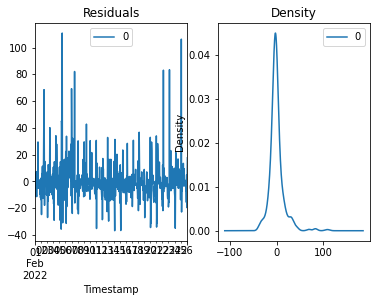

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(ar_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# SARIMAX

In [ ]:
auto_arima(df_train["Memoria Usata"],seasonal=True,m=24).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  604
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 24)   Log Likelihood               -2486.065
Date:                             Fri, 15 Apr 2022   AIC                           4980.129
Time:                                     09:46:28   BIC                           4997.737
Sample:                                          0   HQIC                          4986.982
                                             - 604                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1312      0.030      4.412      0.000       0.073       0.189
ma.L1         -0.9892      0.007   -137.067      0.000      -1.003      -0.975
ar.S.L24       0.2907      0.021     13.541      0.000       0.249       0.333
sigma2       221.2232      4.592     48.172      0.000     212.222     230.224
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              5447.33
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             2.37
Prob(H) (two-sided):                  0.03   Kurtosis:                        16.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sarimax_model = SARIMAX(df_train["Memoria Usata"], order=(2, 1, 3),seasonal_order =(1, 0, [], 24))
sarimax_model_fit = sarimax_model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
sarimax_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Memoria Usata   No. Observations:                  604
Model:             SARIMAX(2, 1, 3)x(1, 0, [], 24)   Log Likelihood               -2484.221
Date:                             Fri, 15 Apr 2022   AIC                           4982.443
Time:                                     09:46:36   BIC                           5013.256
Sample:                                 02-01-2022   HQIC                          4994.435
                                      - 02-26-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4377      0.304      1.441      0.150      -0.158       1.033
ar.L2         -0.5391      0.231     -2.336      0.019      -0.991      -0.087
ma.L1         -1.3163      0.302     -4.357      0.000      -1.908      -0.724
ma.L2          0.8946      0.421      2.126      0.034       0.070       1.719
ma.L3         -0.5646      0.218     -2.586      0.010      -0.992      -0.137
ar.S.L24       0.2930      0.022     13.294      0.000       0.250       0.336
sigma2       220.1527      5.344     41.200      0.000     209.680     230.626
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              5013.73
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             2.31
Prob(H) (two-sided):                  0.02   Kurtosis:                        16.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
checkfit = sarimax_model_fit.forecast(steps=len(df_train))
nrmse_checkfit = rmse(checkfit, df_train["Memoria Usata"])/(np.max(df_train["Memoria Usata"])-np.min(df_train["Memoria Usata"]))
nrmse_checkfit

0.10074836159505604

In [ ]:
df_train["sarimax_predict"]=list(checkfit)

In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=df_train.index,
    y =df_train["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=df_train.index,
    y =df_train["sarimax_predict"]

))

fig.show()

In [ ]:
from statsmodels.tools.eval_measures import rmse

ts_pred_seasonal = sarimax_model_fit.forecast(steps=len(df_test))
nrmse_seasonal = rmse(ts_pred_seasonal, df_test["Memoria Usata"])/(np.max(df_test["Memoria Usata"])-np.min(df_test["Memoria Usata"]))
nrmse_seasonal

0.19954967469314405

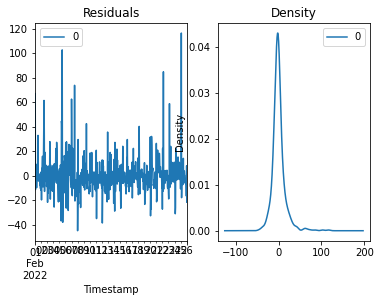

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(sarimax_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
df_test["sarimax_predict"]=list(ts_pred_seasonal)

In [ ]:
df_test

,Memoria Usata,arima_predict,sarimax_predict
Timestamp,,,
2022-02-26 04:00:00,50.257778,68.723669,62.771886
2022-02-26 05:00:00,72.708140,64.831811,68.794164
2022-02-26 06:00:00,71.397551,66.416246,65.209970
2022-02-26 07:00:00,70.152863,67.638941,65.978132
2022-02-26 08:00:00,71.724484,67.353091,65.651940
...,...,...,...
2022-02-28 19:00:00,67.097551,67.054263,66.074056
2022-02-28 20:00:00,61.370595,66.750673,66.142901
2022-02-28 21:00:00,69.099310,65.652513,65.985873


In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=df_test.index,
    y =df_test["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=df_test.index,
    y =ts_pred_seasonal

))

fig.show()

https://towardsdatascience.com/understanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa

# DENEME

In [ ]:
def sarimax(ts,all_param):
    results = []
    for param in all_param:
        try:
            mod = SARIMAX(ts,
                          order=param[0],
                          seasonal_order=param[1])
            res = mod.fit()
            results.append((res,res.aic,param))
            print('Tried out SARIMAX{}x{} - AIC:{}'.format(param[0], param[1], round(res.aic,2)))
        except Exception as e:
            print(e)
            continue
            
    return results

In [ ]:
from sklearn.model_selection import train_test_split
# X = df_15.index
# y = df_15["Memoria Usata"]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

train = df_15[:int(len(df_15)*0.8)].drop("arima_predict",axis=1)
test = df_15[int(len(df_15)*0.8):] .drop("arima_predict",axis=1)

In [ ]:
train

In [ ]:
# set parameter range
p,d,q = range(0,3),[1],range(0,3)
P,D,Q,s = range(0,3),[1],range(0,3),[7]
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))
all_param = list(itertools.product(pdq,seasonal_pdq))

all_res = sarimax(train,all_param)

In [ ]:
all_res.sort(key=lambda x: x[1])
all_res[:5]

In [ ]:
res = all_res[0][0]
res.plot_diagnostics(figsize=(15, 12))

plt.show()
print("Ljung-box p-values:\n" + str(res.test_serial_correlation(method='ljungbox')[0][1]))
res.summary()

In [ ]:
max(train.index), max(test.index)

In [ ]:
train.index[-24]

In [ ]:
min(train.index), min(test.index)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE, r2_score, mean_absolute_percentage_error as MAPE

pred_test = res.get_prediction(start=max(train.index),end=max(test.index))
# err = 'Mean absolute percentage error: %.2f'% MAPE(test, pred_test.predicted_mean) + \
# '\nRoot mean squared error: %.2f'% math.sqrt(MSE(test, pred_test.predicted_mean))

pred = res.get_prediction(start=min(train.index),end=max(test.index))
pred_ci = pred.conf_int()

fig, ax = plt.subplots(figsize=(12,7))
ax.set(title='Energy consumption', ylabel='kWh')

df_15.plot(ax=ax, style = 'o')
pred.predicted_mean.plot(ax=ax, style='o')
# demo_start = train.index[-24]
# ci = pred_ci.loc[demo_start:]
# ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

# plt.figtext(0.12, -0.06, err, ha="left",fontsize=15,va='center')
# legend = ax.legend(["Train Set Observed","Test Set Observed", "Forecast"])

In [ ]:
pred_test.predicted_mean

In [ ]:
test["predicted"]= pred_test.predicted_mean

In [ ]:
test


In [ ]:
plt.plot(test["Memoria Usata"], test.predicted, "o")

In [ ]:
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x = test.index,
    y = test["Memoria Usata"]
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x = test.index,
    y = test.predicted

))

fig.show()

https://medium.com/inflation-forecasting-using-sarimax-and-nkpc/plotting-monthly-inflation-over-the-selected-time-period-to-check-if-the-time-series-has-any-35e3b1fac761

https://stats.stackexchange.com/questions/529827/python-auto-arima-predicts-constant-value

https://quan-possible.github.io/energy-demand-prediction/daily